In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
X = pd.read_csv ('X_train.csv').drop(columns = ['Unnamed: 0'])
y  =pd.read_csv ('y_train.csv').drop(columns = ['Unnamed: 0'])

In [5]:
import pickle
with open('model_scaler.pkl', 'rb') as f_model_scaler:
    scaler = pickle.load(f_model_scaler) 

In [6]:
X = scaler.transform(X)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

In [8]:
import tensorflow as tf


#### Logistic Regression


In [9]:
model_log = tf.keras.Sequential()
model_log.add(tf.keras.layers.Dense(1,input_shape = (893,), activation = 'sigmoid'))
model_log.compile(tf.keras.optimizers.SGD(lr = 0.01),loss = "binary_crossentropy", metrics = ["AUC"])
model_log.fit(X_train,y_train,epochs = 25 ,verbose = 1,batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/25
7403/7403 [==============================] - 4s 521us/step - loss: 0.2108 - auc: 0.8295 - val_loss: 0.0578 - val_auc: 0.9783
Epoch 2/25
7403/7403 [==============================] - 4s 479us/step - loss: 0.0480 - auc: 0.9763 - val_loss: 0.0529 - val_auc: 0.9757
Epoch 3/25
7403/7403 [==============================] - 4s 477us/step - loss: 0.0443 - auc: 0.9765 - val_loss: 0.0508 - val_auc: 0.9758
Epoch 4/25
7403/7403 [==============================] - 4s 481us/step - loss: 0.0425 - auc: 0.9776 - val_loss: 0.0495 - val_auc: 0.9764
Epoch 5/25
7403/7403 [==============================] - 4s 484us/step - loss: 0.0410 - auc: 0.9779 - val_loss: 0.0488 - val_auc: 0.9768
Epoch 6/25
7403/7403 [==============================] - 4s 473us/step - loss: 0.0412 - auc: 0.9762 - val_loss: 0.0491 - val_auc: 0.9722
Epoch 7/25
7403/7403 [==============================] - 4s 479us/step - loss: 0.0409 - auc: 0.9754 - val_loss: 0.0480 - val_auc: 0.9760
Epoch 8/25
7403/7403 [==========================

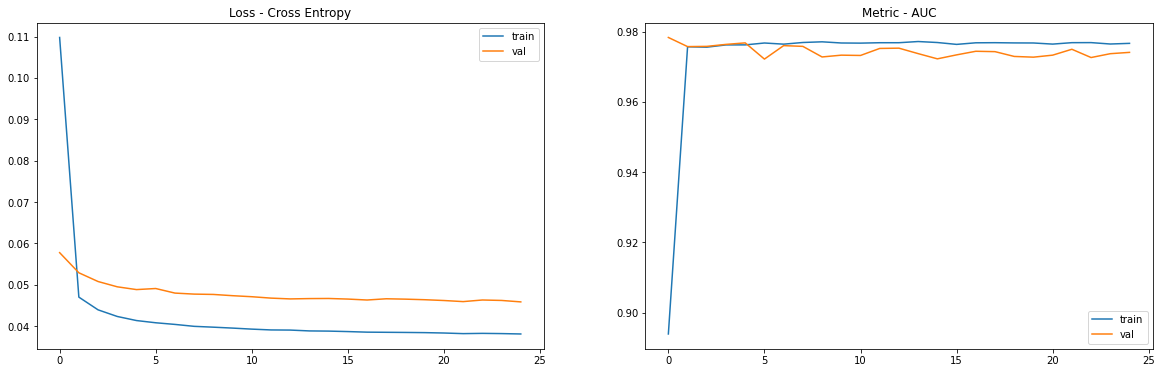

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(model_log.history.history['loss'], label='train')
ax1.plot(model_log.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_log.history.history['auc'], label='train')
ax2.plot(model_log.history.history['val_auc'], label='val')
ax2.set_title('Metric - AUC')
ax2.legend()
plt.show()

In [11]:
model_log.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 894       
Total params: 894
Trainable params: 894
Non-trainable params: 0
_________________________________________________________________


#### ANN Deep

In [30]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(1,input_shape = X_train.shape[1:]))
model_2.add(tf.keras.layers.Dense(20, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(20, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(1))
model_2.add(Activation('sigmoid'))
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1)                 894       
_________________________________________________________________
dense_23 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_24 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 21        
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 1,375
Trainable params: 1,375
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_2.compile(tf.keras.optimizers.SGD(lr = 0.01),loss = "binary_crossentropy", metrics = ["AUC"])
model_2.fit(X_train,y_train,epochs = 30 ,verbose = 1,batch_size = 32, validation_data=(X_val, y_val))

Epoch 1/30
7403/7403 [==============================] - 4s 545us/step - loss: 0.1192 - auc: 0.7003 - val_loss: 0.0414 - val_auc: 0.9705
Epoch 2/30
7403/7403 [==============================] - 4s 512us/step - loss: 0.0382 - auc: 0.9710 - val_loss: 0.0377 - val_auc: 0.9741
Epoch 3/30
7403/7403 [==============================] - 4s 511us/step - loss: 0.0355 - auc: 0.9707 - val_loss: 0.0364 - val_auc: 0.9768
Epoch 4/30
7403/7403 [==============================] - 4s 509us/step - loss: 0.0346 - auc: 0.9742 - val_loss: 0.0361 - val_auc: 0.9773
Epoch 5/30
7403/7403 [==============================] - 4s 509us/step - loss: 0.0338 - auc: 0.9739 - val_loss: 0.0359 - val_auc: 0.9778
Epoch 6/30
7403/7403 [==============================] - 4s 522us/step - loss: 0.0336 - auc: 0.9736 - val_loss: 0.0353 - val_auc: 0.9779
Epoch 7/30
7403/7403 [==============================] - 4s 531us/step - loss: 0.0324 - auc: 0.9767 - val_loss: 0.0352 - val_auc: 0.9781
Epoch 8/30
7403/7403 [==========================

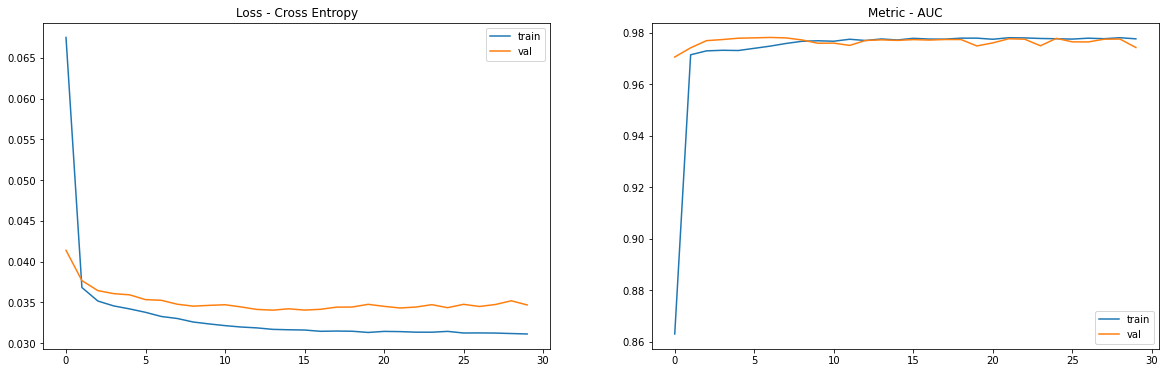

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(model_2.history.history['loss'], label='train')
ax1.plot(model_2.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_2.history.history['auc'], label='train')
ax2.plot(model_2.history.history['val_auc'], label='val')
ax2.set_title('Metric - AUC')
ax2.legend()
plt.show()

In [40]:
model_log.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 894       
Total params: 894
Trainable params: 894
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1)                 894       
_________________________________________________________________
dense_23 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_24 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 21        
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 1,375
Trainable params: 1,375
Non-trainable params: 0
_________________________________________________________________


In [49]:
from sklearn.metrics import f1_score
print(f1_score(y_train, model_log.predict(X_train) > 0.5))
print(f1_score(y_train, model_1.predict(X_train) > 0.5))
print(f1_score(y_train, model_2.predict(X_train) > 0.5))

0.24792985874330245
0.20100250626566418
0.0


In [51]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,model_log.predict(X_train) > 0.5))
print(confusion_matrix(y_train,model_1.predict(X_train) > 0.5))
print(confusion_matrix(y_train,model_2.predict(X_train) > 0.5))

[[233294    457]
 [  2631    509]]
[[233302    449]
 [  2739    401]]
[[233751      0]
 [  3140      0]]


#### Logistic Regression Analysis


In [52]:
from sklearn import metrics

In [53]:
def plot_metrics(y_true,y_proba,num=50,plot_metrics=False,plot_ROC=False):
	#y proba es la probabilidad. num poens 100 y te salen todos los threshold
    P= y_true[y_true == 1].shape[0]
    N= y_true[y_true == 0].shape[0]
    if plot_metrics:
        cond_pos= P/(P+N)
        cond_neg= N/(P+N)
        # Reserva de espacio para las métricas
        accuracy=np.zeros(num)
        specificity=np.zeros(num)
        ppv=np.zeros(num)
        npv=np.zeros(num)
        fnr=np.zeros(num)
    sensitivity=np.zeros(num+2) # Se reservan dos lugares mas, para fijar lo thresholds en cero y uno
    fpr=np.zeros(num+2)  # Se reservan dos lugares mas, para fijar lo thresholds en cero y uno
    thresholds=np.linspace(0.01,0.99,num)
    for idx,threshold in enumerate(thresholds):
        y_pred=1*(y_proba>threshold)
        conf_matrix=metrics.confusion_matrix(y_true, y_pred, labels=[0,1])
        TN=conf_matrix[0,0]
        FN=conf_matrix[1,0]
        FP=conf_matrix[0,1]
        TP=conf_matrix[1,1]
        sensitivity[idx+1]= TP/(TP + FN)
        fpr[idx+1]= FP/(FP + TN)
        if(plot_metrics):
            accuracy[idx]= (TN + TP)/(TN + FN + FP + TP)
            specificity[idx]= TN / (TN + FP)
            ppv[idx]= TP/(TP + FP)
            npv[idx]= TN/(TN + FN)
            fnr[idx]= FN / (FN + TP)
    # Completo los valores de los extremos.
    sensitivity[0]=1 
    sensitivity[-1]=0
    fpr[0]=1
    fpr[-1]=0
    roc_auc = metrics.auc(fpr, sensitivity)
    if(plot_metrics):
        # Gráfica de las métricas en función del threshold
        plt.figure(figsize=[15,10])
        plt.plot(np.linspace(0,1,num),accuracy, label='Accuracy')
        plt.plot(np.linspace(0,1,num),sensitivity[1:-1], label='Sensitivity or True Positive Rate or Recall')
        plt.plot(np.linspace(0,1,num),specificity, label='Specificity')
        plt.plot(np.linspace(0,1,num),ppv, label='Positive Predictive Value or Precision ')
        plt.plot(np.linspace(0,1,num),npv, label='Negative Predictive Value')
        plt.plot(np.linspace(0,1,num),fnr, label='False Negative Rate or Miss Rate')
        plt.plot(np.linspace(0,1,num),fpr[1:-1], label='False Positive Rate or Fall-out')
        plt.legend()
        plt.ylabel('Metric')
        plt.xlabel('Threshold')
        plt.show()
    if(plot_ROC):
        plt.plot(fpr,sensitivity,label="ROC curve. Area={}".format(roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()
    cant_obs=len(y_true)
    epsilon=1e-9 # este valor está para evitar el logaritmo de cero    
    loss =  metrics.log_loss(y_true,y_proba)
    return roc_auc,loss

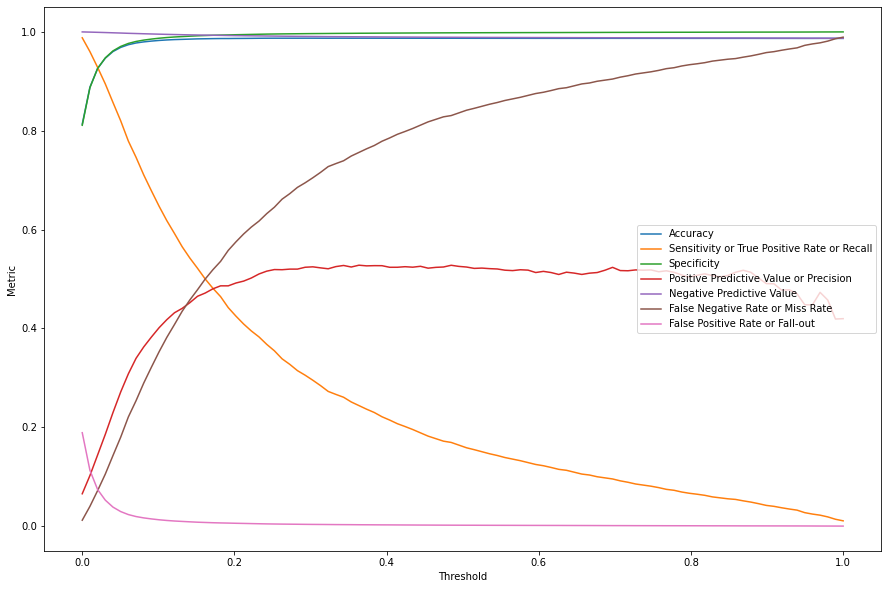

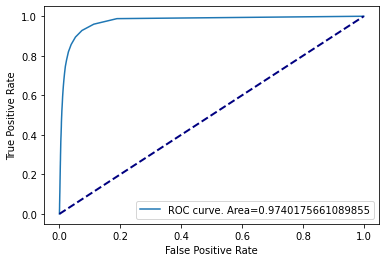

(0.9740175661089855, nan)

In [54]:
plot_metrics(y_train,model_log.predict(X_train),num=100,plot_metrics=True,plot_ROC=True)

In [61]:
confusion_matrix(y_train,model_log.predict(X_train) > 0.05)

array([[224839,   8912],
       [   455,   2685]], dtype=int64)

In [66]:
X_test = pd.read_csv('X_test.csv').drop(columns = ['Unnamed: 0'])
y_test = pd.read_csv('y_test.csv').drop(columns = ['Unnamed: 0'])

In [67]:
X_test = scaler.transform(X_test)

In [72]:
confusion_matrix(y_test,model_log.predict(X_test) > 0.05)

array([[123131,   4754],
       [   247,   1511]], dtype=int64)

In [77]:
f1_score(y_test, model_log.predict(X_test) > 0.05)

0.37666708213885075

In [78]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model_log.predict(X_test))

0.9765645933937999

In [80]:
model_log.save('LogRegModel')

INFO:tensorflow:Assets written to: LogRegModel\assets
